In [3]:
library(data.table)

In [4]:
library(ggplot2)

In [5]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
options(scipen=999)

# Registered user event lengths

In [29]:
registered_user_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/registered_user_session_data.tsv", header=TRUE, sep="\t"))

In [30]:
registered_user_mwsessions_results$start_time <- as.POSIXct(as.character(registered_user_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [31]:
registered_user_mwsessions_results$end_time <- as.POSIXct(as.character(registered_user_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [32]:
registered_user_mwsessions_results$time_difference <- as.numeric(registered_user_mwsessions_results$end_time - registered_user_mwsessions_results$start_time)

In [33]:
registered_user_mwsessions_results$log_time_difference <- log10(registered_user_mwsessions_results$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [34]:
nrow(registered_user_mwsessions_results[time_difference < 0,])

[1] 44

In [35]:
attach(registered_user_mwsessions_results)

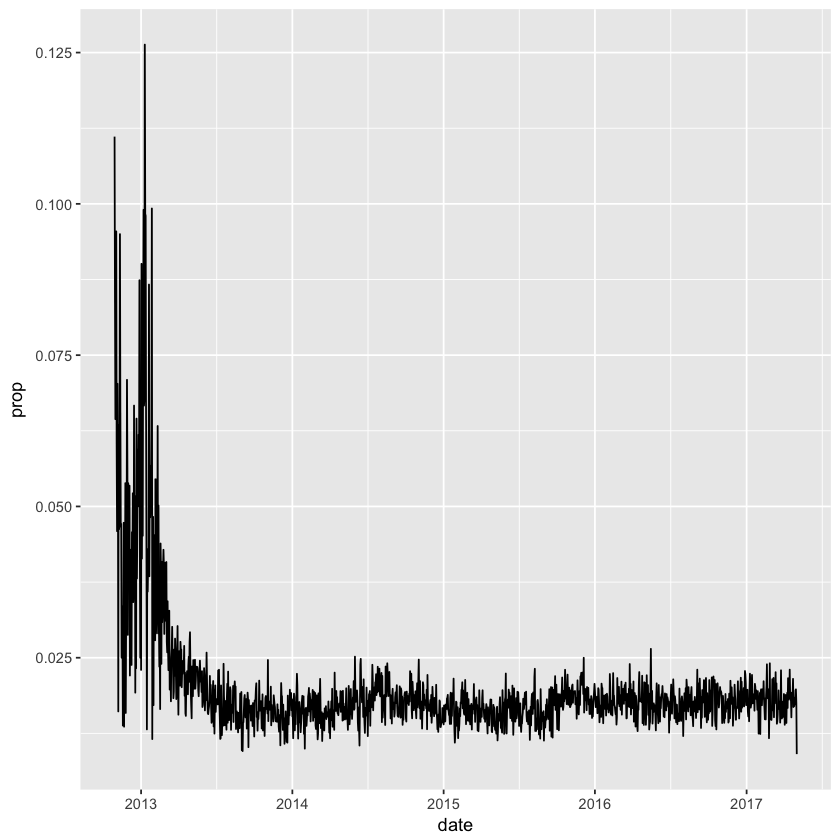

In [36]:
ggplot(registered_user_mwsessions_results[,
list(n=length(time_difference), prop=mean(time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”

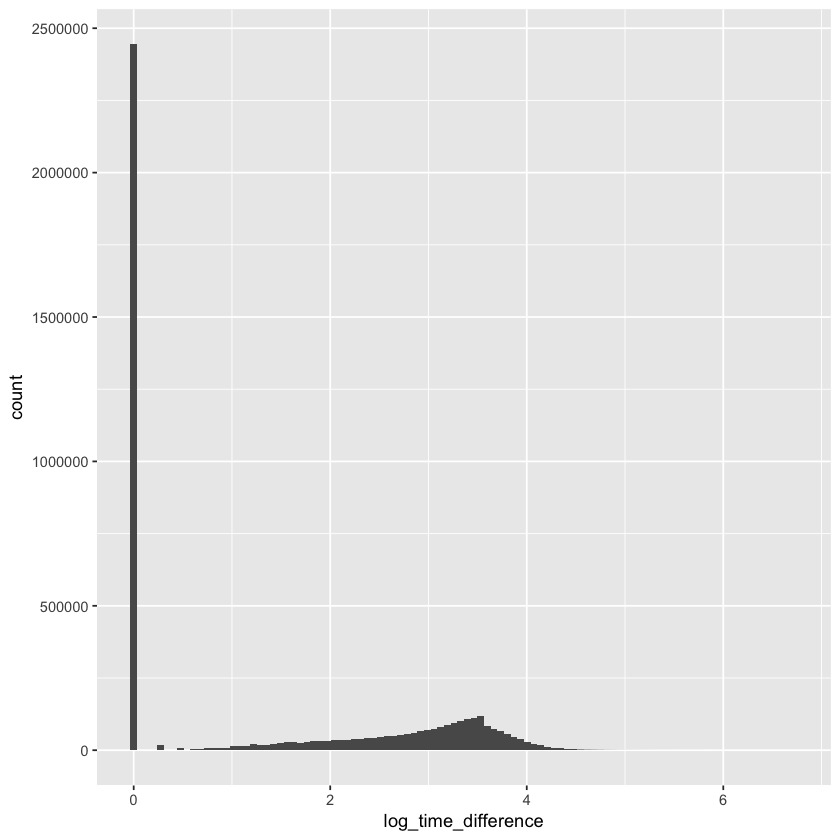

In [37]:
ggplot(registered_user_mwsessions_results,aes(x=log_time_difference)) + geom_histogram(bins=100)

In [38]:
detach(registered_user_mwsessions_results)

# Anon event lengths

In [39]:
anon_mwsessions_results <- data.table(read.table("~/Desktop/temp", header=TRUE, sep="\t"))

In [40]:
anon_mwsessions_results$start_time <- as.POSIXct(as.character(anon_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [41]:
anon_mwsessions_results$end_time <- as.POSIXct(as.character(anon_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [42]:
anon_mwsessions_results$time_difference <- as.numeric(anon_mwsessions_results$end_time - anon_mwsessions_results$start_time)

In [43]:
anon_mwsessions_results$log_time_difference <- log10(anon_mwsessions_results$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [44]:
nrow(anon_mwsessions_results[time_difference < 0,])

[1] 1

In [45]:
attach(anon_mwsessions_results)

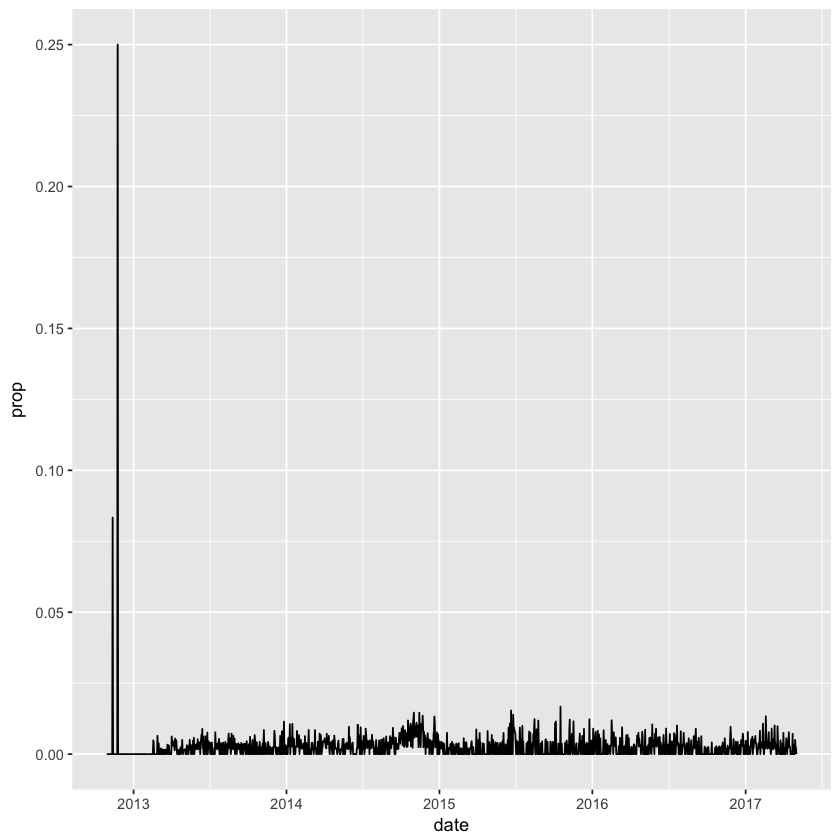

In [46]:
ggplot(anon_mwsessions_results[,
list(n=length(time_difference), prop=mean(time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

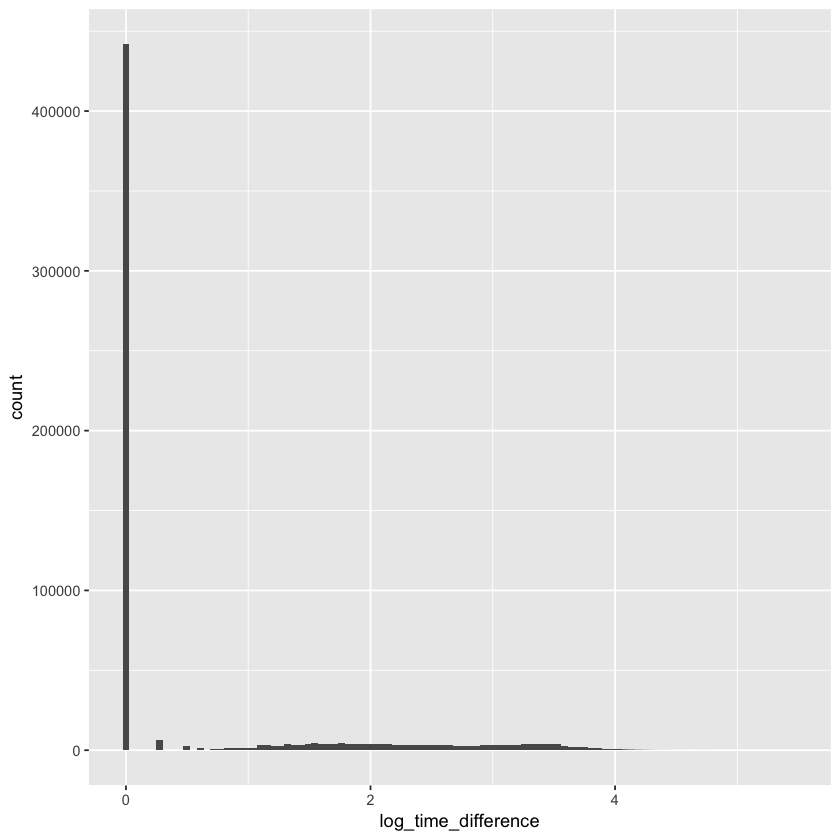

In [47]:
ggplot(anon_mwsessions_results,aes(x=log_time_difference)) + geom_histogram(bins=100)